In [1]:
import pandas as pd
import numpy as np

from glob import glob

In [2]:
target_path = "../data/seoul_crime/"
file_list = glob(target_path + "20*.csv")
file_list

['../data/seoul_crime/2009년.csv',
 '../data/seoul_crime/2014년.csv',
 '../data/seoul_crime/2003년.csv',
 '../data/seoul_crime/2010년.csv',
 '../data/seoul_crime/2017년.csv',
 '../data/seoul_crime/2008년.csv',
 '../data/seoul_crime/2015년.csv',
 '../data/seoul_crime/2012년.csv',
 '../data/seoul_crime/2018년.csv',
 '../data/seoul_crime/2006년.csv',
 '../data/seoul_crime/2013년.csv',
 '../data/seoul_crime/2004년.csv',
 '../data/seoul_crime/2011년.csv',
 '../data/seoul_crime/2000년.csv',
 '../data/seoul_crime/2005년.csv',
 '../data/seoul_crime/2001년.csv',
 '../data/seoul_crime/2007년.csv',
 '../data/seoul_crime/2002년.csv',
 '../data/seoul_crime/2016년.csv']

In [4]:
file_list = sorted(file_list)
file_list[:5]

['../data/seoul_crime/2000년.csv',
 '../data/seoul_crime/2001년.csv',
 '../data/seoul_crime/2002년.csv',
 '../data/seoul_crime/2003년.csv',
 '../data/seoul_crime/2004년.csv']

In [6]:
crime_raw_data = pd.read_csv(file_list[0], usecols=[0,1,2,3], encoding="euc-kr")
crime_raw_data.tail()

,구분,죄종,발생검거,건수
305,수서,강간,검거,29
306,수서,절도,발생,1183
307,수서,절도,검거,352
308,수서,폭력,발생,3351
309,수서,폭력,검거,2983


In [12]:
crime_station = crime_raw_data.pivot_table(index="구분", columns=["죄종", "발생검거"], values="건수")

In [13]:
crime_station.tail(1)

죄종    강간      강도     살인      절도          폭력      
발생검거  검거  발생  검거  발생 검거 발생   검거    발생    검거    발생
구분                                               
혜화    41  40  24  30  3  3  429  1239  2444  2631

In [14]:
crime_station.columns = ["강간검거", "강간발생", 
                         "강도검거", "강도발생",
                         "살인검거", "살인발생", 
                         "절도검거", "절도발생", 
                         "폭력검거", "폭력발생"]

In [20]:
crime_station["year"] = 2000

In [21]:
crime_station.head()

,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,year
구분,,,,,,,,,,,
강남,70,78,72,146,4,3,523,2653,4345,4892,2000
강동,58,62,40,49,11,12,671,1838,4333,4716,2000
강북,48,47,48,47,8,9,458,859,3446,3624,2000
강서,64,75,55,75,7,6,509,1559,3988,4361,2000
관악,44,59,36,56,7,8,349,1764,2658,2921,2000


In [28]:
file_list[0].split("/")[-1][:4]

'2000'

In [38]:
crime_station_t = []
for each_file in file_list:
    crime_raw_data = pd.read_csv(each_file, usecols=[0,1,2,3], encoding="euc-kr")
    crime_station = crime_raw_data.pivot_table(
        crime_raw_data,
        index="구분", 
        columns=["죄종", "발생검거"], 
        aggfunc=np.sum)
    
    crime_station.columns = [
        "강간검거", "강간발생", 
        "강도검거", "강도발생",
        "살인검거", "살인발생", 
        "절도검거", "절도발생", 
        "폭력검거", "폭력발생"]
    
    crime_station["year"] = each_file.split("/")[-1][:4]
    crime_station.reset_index(inplace=True)
    crime_station_t.append(crime_station)

In [39]:
len(crime_station_t)

19

In [41]:
crime_total = pd.concat(crime_station_t)

In [42]:
crime_total.tail(1)

,구분,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,year
30,혜화,58.0,100.0,2.0,2.0,1.0,1.0,340.0,739.0,712.0,831.0,2018


In [43]:
crime_total.pivot_table(index="year", columns="구분", values="살인발생")

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2000,3.0,12.0,9.0,6.0,8.0,2.0,10.0,10.0,3.0,3.0,...,3.0,5.0,6.0,5.0,2.0,4.0,8.0,13.0,1.0,3.0
2001,13.0,9.0,6.0,16.0,3.0,14.0,4.0,13.0,6.0,8.0,...,4.0,8.0,7.0,3.0,6.0,3.0,10.0,16.0,0.0,4.0
2002,3.0,6.0,7.0,8.0,8.0,12.0,4.0,16.0,2.0,7.0,...,7.0,6.0,3.0,2.0,3.0,0.0,5.0,8.0,1.0,4.0
2003,7.0,6.0,9.0,5.0,4.0,6.0,6.0,15.0,2.0,3.0,...,5.0,7.0,8.0,14.0,5.0,3.0,2.0,11.0,0.0,5.0
2004,8.0,7.0,15.0,8.0,0.0,10.0,13.0,16.0,1.0,5.0,...,6.0,6.0,5.0,8.0,5.0,1.0,7.0,7.0,2.0,7.0
2005,8.0,5.0,10.0,10.0,5.0,16.0,10.0,14.0,1.0,10.0,...,5.0,12.0,4.0,9.0,7.0,3.0,6.0,14.0,2.0,2.0
2006,5.0,4.0,5.0,16.0,5.0,7.0,16.0,5.0,2.0,6.0,...,4.0,5.0,12.0,9.0,3.0,7.0,6.0,11.0,4.0,5.0
2007,8.0,7.0,12.0,4.0,13.0,8.0,19.0,6.0,0.0,11.0,...,4.0,8.0,13.0,9.0,6.0,5.0,8.0,13.0,4.0,2.0
2008,10.0,8.0,7.0,18.0,10.0,3.0,22.0,3.0,1.0,3.0,...,3.0,11.0,19.0,7.0,7.0,5.0,5.0,7.0,4.0,3.0


In [46]:
crime_total_murder = crime_total.pivot_table(index="year", columns="구분", values="살인발생")
crime_total_murder.tail(1)

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2018,5.0,3.0,8.0,11.0,9.0,7.0,8.0,6.0,1.0,5.0,...,5.0,2.0,17.0,1.0,4.0,5.0,6.0,4.0,1.0,1.0


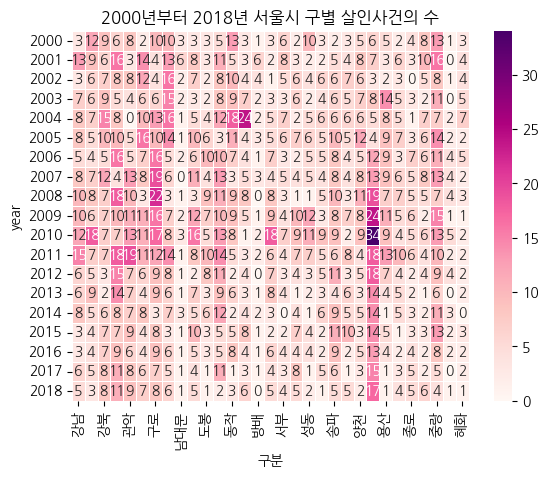

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

figsize=(13,10)
sns.heatmap(crime_total_murder, annot=True, linewidths=.5, cmap="RdPu")

plt.title("2000년부터 2018년 서울시 구별 살인사건의 수")
plt.show();

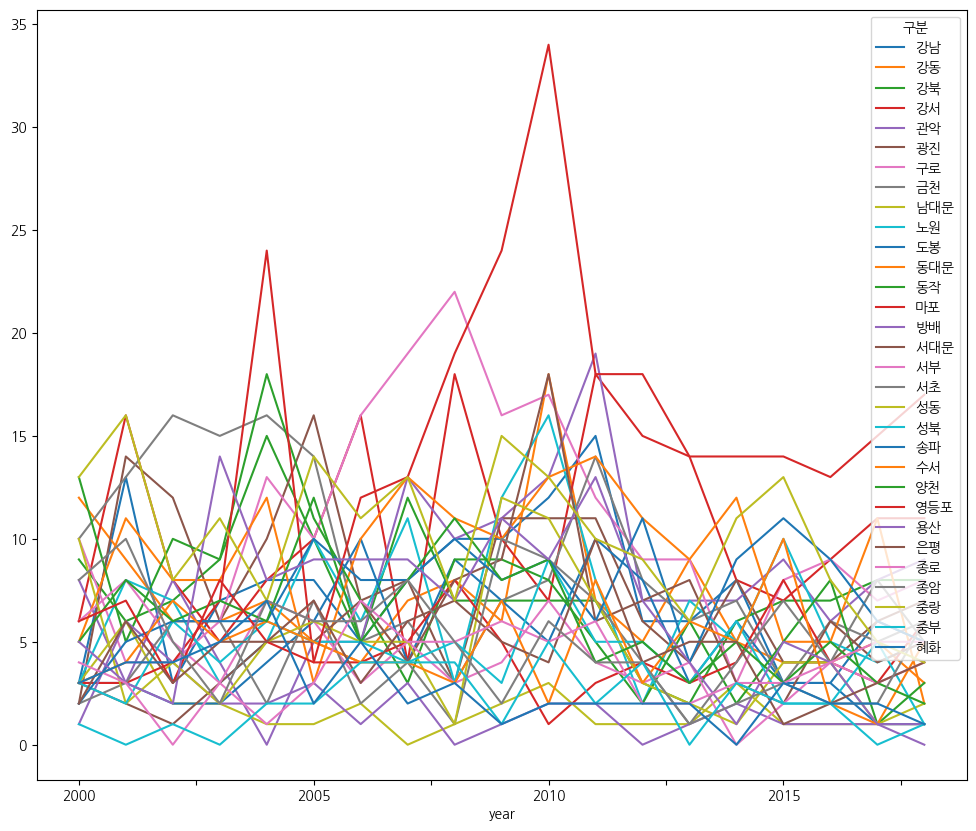

In [52]:
crime_total_murder.plot(figsize=(12,10));

## 강남 서초 영등포

In [55]:
crime_total_murder[["강남", "서초","영등포"]]

구분,강남,서초,영등포
year,,,
2000,3.0,2.0,6.0
2001,13.0,3.0,7.0
2002,3.0,6.0,3.0
2003,7.0,6.0,8.0
2004,8.0,2.0,5.0
2005,8.0,7.0,4.0
2006,5.0,2.0,12.0
2007,8.0,4.0,13.0
2008,10.0,1.0,19.0


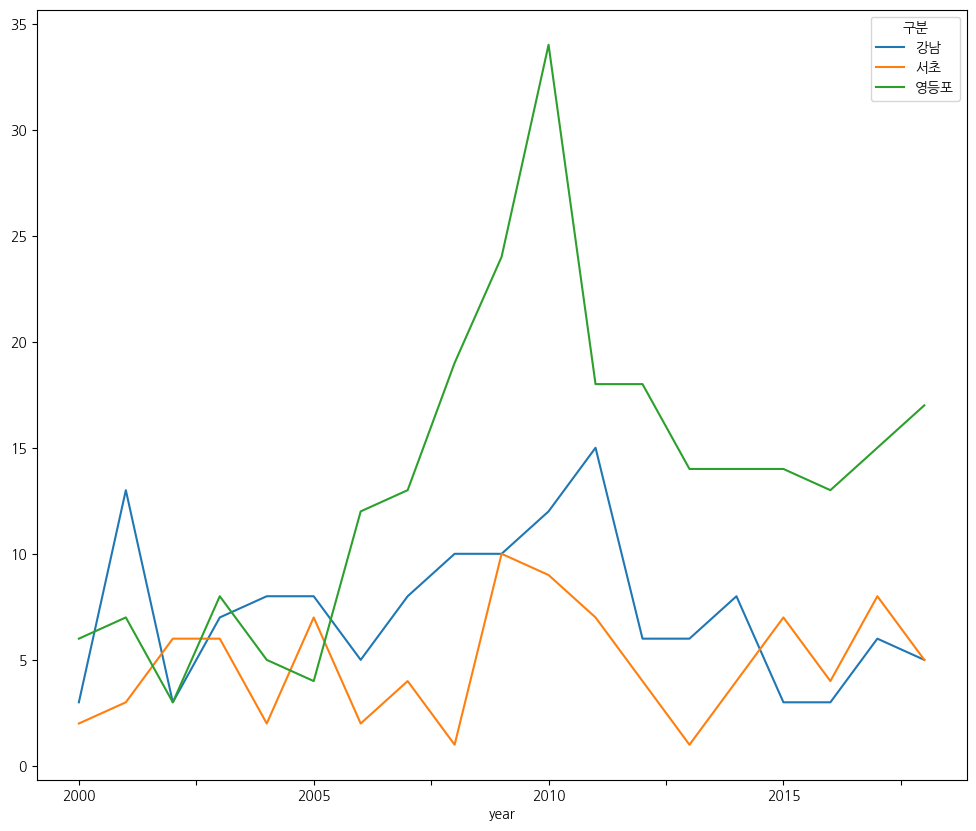

In [56]:
crime_total_murder[["강남", "서초","영등포"]].plot(figsize=(12,10));

## 1. crime_total 데이터프레임을 인덱스는 년도, 컬럼은 구분, 값은 폭력으로 변환해주세요

In [61]:
crime_total_violence = crime_total.pivot_table(index="year", columns="구분", values="폭력발생")
crime_total_violence.tail(1)

구분,강남,강동,강북,강서,관악,광진,구로,금천,남대문,노원,...,수서,양천,영등포,용산,은평,종로,종암,중랑,중부,혜화
year,,,,,,,,,,,,,,,,,,,,,
2018,2188.0,2224.0,2122.0,2619.0,2643.0,1908.0,2826.0,1912.0,779.0,2381.0,...,1697.0,2005.0,3132.0,1980.0,1308.0,1131.0,801.0,2581.0,1176.0,831.0


## 2. 변환된 데이터 프레임으로 강남, 서초, 영등포, 노원, 관악의 선 그래프를 그려주세요.

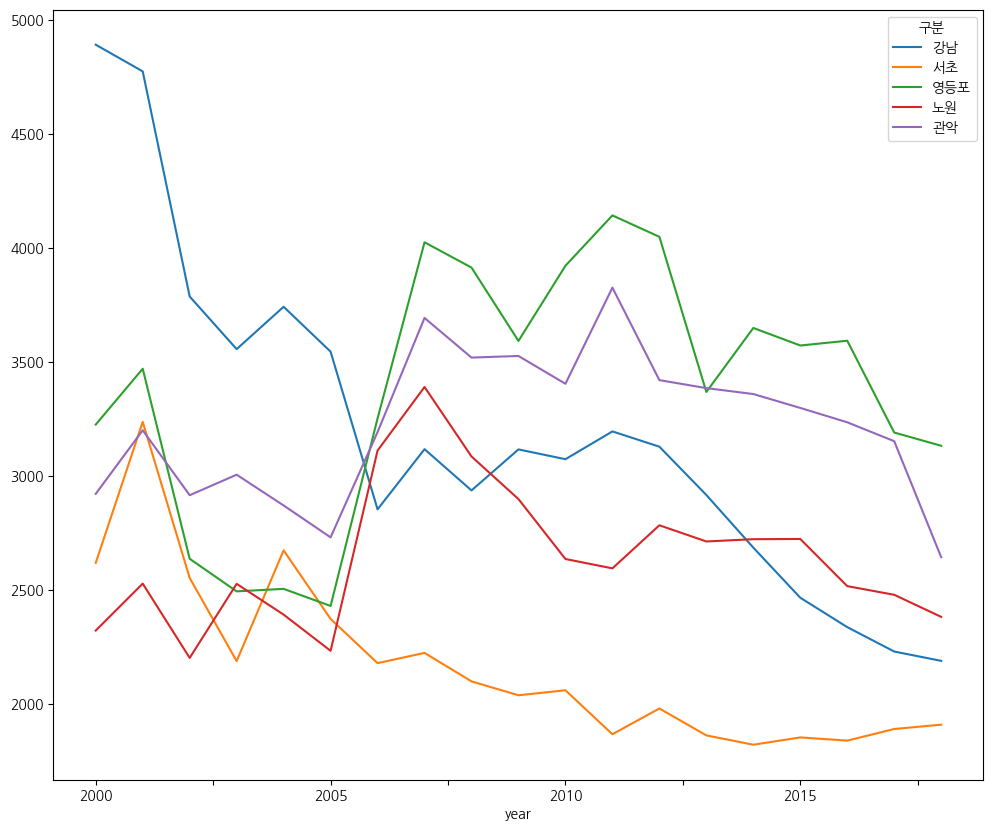

In [62]:
crime_total_violence[["강남", "서초","영등포", "노원", "관악"]].plot(figsize=(12,10));